In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
df = pd.read_csv("Dataset/cleaned.csv", index_col=0)
df.time_hr = pd.to_timedelta(df.time_hr, unit = "hours")
print("Before filtering", len(df))


def single_dose_level(group):
    
    unique_vals = group.dose_level_normalized.unique()
    
    if len(unique_vals) != 1:
        return
    
    return not pd.isna(unique_vals[0])

df = df[df.dose_duration != "continuous"]

df = df.groupby("fk_series_id").filter(single_dose_level)
print("after filtering", len(df))

df.species = df.species.str.lower()
df.head()

Before filtering 10352
after filtering 7396


,fk_series_id,time_original,conc_original,conc_sd_original,conc_lower_bound_original,conc_upper_bound_original,no_conc_val_type,time_hr,conc,conc_sd,...,sex,age,age_category,notes,subtype,height,weight,weight_kg,weight_estimated,series_length
0,1,0.069826,2.618893,NaN,NaN,NaN,NaN,0 days 00:04:11.351999999,0.00261,NaN,...,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2,0.0,16
1,1,0.239928,122.156713,NaN,NaN,NaN,NaN,0 days 00:14:23.712000,0.12215,NaN,...,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2,0.0,16
2,1,0.407653,340.571116,47.781570,NaN,NaN,NaN,0 days 00:24:27.540000,0.34057,NaN,...,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2,0.0,16
3,1,0.766816,990.431853,76.792296,NaN,NaN,NaN,0 days 00:46:00.516000,0.99043,NaN,...,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2,0.0,16
4,1,1.066636,510.409394,54.607509,NaN,NaN,NaN,0 days 01:03:59.867999999,0.51040,NaN,...,NaN,NaN,NaN,"half male, half female; healthy and drug-free",Sprague Dawley,NaN,200 ± 20 g,0.2,0.0,16


In [3]:
df.dose_duration.unique()

array([nan, '5 min', '6 hr', '4 hr', '8 hr', '2 hr', '1 min', '95 min',
       '360 min', '3 hr', '6 hr 10min', '120 min'], dtype=object)

In [5]:
def n_unique(x):
    return len(x.unique())


def max_time_freq(df):
    def get_unique_days(x):
        return tuple(x['time_hr'].unique())  # Use tuple to ensure hashability for value_counts

    unique_time_patterns = df.groupby("fk_series_id", ).apply(get_unique_days, include_groups=False)
    return unique_time_patterns.value_counts().max()

analyte_names = df.groupby("analyte_name_original").apply(max_time_freq, include_groups=False)


common = df.groupby("analyte_name_original").agg({"series_length": ["min", "max","mean","count"], "fk_series_id" : [n_unique],"dose_level_normalized": [n_unique], "fk_study_id" : [n_unique], "species" : [np.unique], "time_hr": [n_unique],"dose_duration": [n_unique], "analytical_method_detail" : n_unique, "analytical_method_detail" : n_unique})
common["n_time_freqs"] = analyte_names.loc[common.index]

common = common.sort_values("n_time_freqs", ascending=False)
common.head(10)


series_length      \
                                                            min max   
analyte_name_original                                                 
[14]C                                                         3  15   
Perfluorodecanoic acid                                        3   3   
benzo[a]pyrene                                                4  15   
L-Ephedrine                                                   7   9   
Tamoxifen, free base                                          3   6   
Glyoxylic acid                                                3   6   
Perfluorohexane-1-sulphonic acid – potassium salt             3   3   
3-hydroxybenzo(a)pyrene                                       8  11   
Perfluorooctanoic acid                                        3   4   
dichloromethane                                               5  21   

                                                                    \
                                                        mean count   
analyte_name_original                                                
[14]C                                               9.927835   485   
Perfluorodecanoic acid                              3.000000   189   
benzo[a]pyrene                                     13.104839   248   
L-Ephedrine                                         8.502959   169   
Tamoxifen, free base                                4.924528    53   
Glyoxylic acid                                      5.050847   118   
Perfluorohexane-1-sulphonic acid – potassium salt   3.000000   141   
3-hydroxybenzo(a)pyrene                             8.559322    59   
Perfluorooctanoic acid                              3.100000   120   
dichloromethane                                    11.789474   114   

                                                  fk_series_id  \
                                                      n_unique   
analyte_name_original                                            
[14]C                                                       78   
Perfluorodecanoic acid                                      63   
benzo[a]pyrene                                              21   
L-Ephedrine                                                 20   
Tamoxifen, free base                                        11   
Glyoxylic acid                                              24   
Perfluorohexane-1-sulphonic acid – potassium salt           47   
3-hydroxybenzo(a)pyrene                                      7   
Perfluorooctanoic acid                                      39   
dichloromethane                                             14   

                                                  dose_level_normalized  \
                                                               n_unique   
analyte_name_original                                                     
[14]C                                                                 9   
Perfluorodecanoic acid                                                3   
benzo[a]pyrene                                                        5   
L-Ephedrine                                                           4   
Tamoxifen, free base                                                  1   
Glyoxylic acid                                                        2   
Perfluorohexane-1-sulphonic acid – potassium salt                     2   
3-hydroxybenzo(a)pyrene                                               2   
Perfluorooctanoic acid                                                4   
dichloromethane                                                       4   

                                                  fk_study_id         species  \
                                                     n_unique          unique   
analyte_name_original                                                           
[14]C                                                      13    [mouse, rat]   
Perfluorodecanoic acid                                  

In [6]:

def plot_series_by_species(compound_data):
    compound_name = compound_data.analyte_name_original.iloc[0]
    species_list = compound_data.species.unique()
    
    # Create subplots - one for each species
    fig, axes = plt.subplots(nrows=len(species_list), ncols=1, figsize=(10, 5 * len(species_list)), squeeze=False)
    axes = axes.flatten()  # Ensure axes is always iterable
    for ax, species in zip(axes, species_list):
        # Filter data for the species
        species_data = compound_data[compound_data['species'].apply(lambda x: species in x)]
        species_data['time_hr_numeric'] = species_data['time_hr'].dt.total_seconds()
        unique_times = species_data['time_hr_numeric'].unique()
        
        for time in unique_times:
            # Draw a vertical line at each unique time measurement, converted from Timedelta
            ax.axvline(x=time, color='black', linestyle='--', linewidth=1)
        
        for _, row in species_data.iterrows():
            # Extract time and concentration data for the series using direct indexing
            series_data = species_data[species_data['fk_series_id'] == row['fk_series_id']]
            ax.plot(series_data['time_hr_numeric'], series_data['conc'], label=f"Series ID {row['fk_series_id']}")
            # Mark the dose level at time 0, converting time to numeric if necessary
            initial_dose_time = species_data['time_hr_numeric'].iloc[0]  # First measurement time in seconds
            ax.scatter([initial_dose_time], [row['dose_level_normalized']], color="red")
        
            
        ax.set_title(f"{compound_name} in {species}")
        ax.set_xlabel("Time (hours)")
        ax.set_ylabel("Concentration")

    plt.tight_layout()
    plt.show()

In [7]:
compund = "[14]C"	
selection = df.query("analyte_name_original == @compund")
selection.time_hr.unique()

<TimedeltaArray>
[       '0 days 04:00:00',        '0 days 08:00:00',        '1 days 00:00:00',
        '2 days 00:00:00',        '4 days 00:00:00',        '0 days 00:30:00',
        '0 days 01:00:00',        '0 days 02:00:00',        '0 days 12:00:00',
        '0 days 22:00:00', '0 days 23:59:59.964000', '0 days 00:04:59.988000',
 '0 days 00:09:59.976000', '0 days 00:19:59.988000',        '0 days 00:45:00',
        '0 days 01:30:00',        '0 days 03:00:00',        '0 days 05:00:00',
        '0 days 06:00:00',        '1 days 08:00:00', '0 days 00:39:59.976000']
Length: 21, dtype: timedelta64[ns]

/tmp/ipykernel_26457/99749603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['time_hr_numeric'] = species_data['time_hr'].dt.total_seconds()
/tmp/ipykernel_26457/99749603.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['time_hr_numeric'] = species_data['time_hr'].dt.total_seconds()


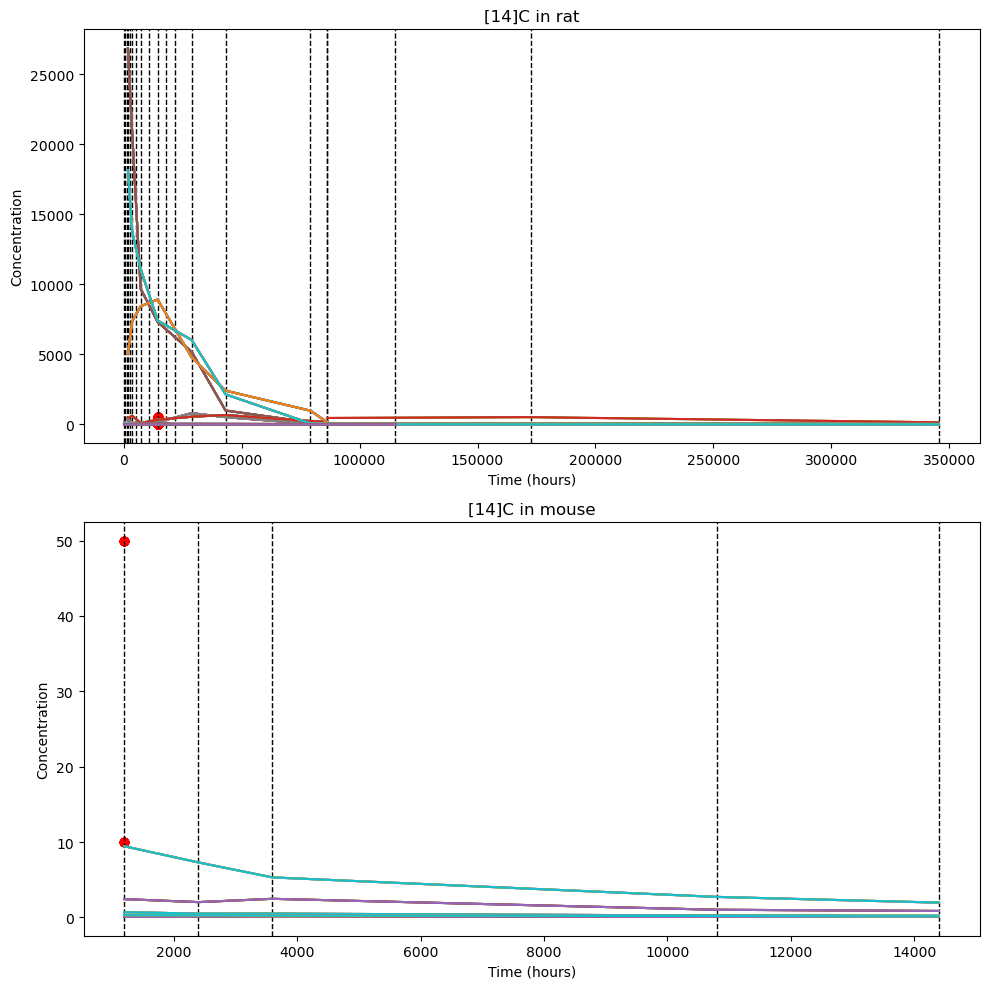

In [8]:
plot_series_by_species(selection)

In [9]:
def get_unique_days(x):
        return tuple(x['time_hr'].unique())  # Use tuple to ensure hashability for value_counts

unique_time_patterns = selection.groupby("fk_series_id", ).apply(get_unique_days, include_groups=False)
vcs = unique_time_patterns.value_counts()
max_val = vcs.idxmax()
vcs

(1 days 00:00:00, 2 days 00:00:00, 4 days 00:00:00)                                                                                                                                                                                                                                     40
(0 days 00:04:59.988000, 0 days 00:09:59.976000, 0 days 00:19:59.988000, 0 days 00:30:00, 0 days 00:45:00, 0 days 01:00:00, 0 days 01:30:00, 0 days 02:00:00, 0 days 03:00:00, 0 days 04:00:00, 0 days 05:00:00, 0 days 06:00:00, 0 days 08:00:00, 1 days 00:00:00, 1 days 08:00:00)    17
(0 days 04:00:00, 0 days 08:00:00, 1 days 00:00:00, 2 days 00:00:00)                                                                                                                                                                                                                    10
(0 days 00:19:59.988000, 0 days 00:39:59.976000, 0 days 01:00:00, 0 days 03:00:00, 0 days 04:00:00)                                                    

In [11]:
group = selection.groupby("fk_series_id").filter(lambda x: get_unique_days(x)==max_val)
group.groupby("analyte_name_original").agg({"series_length": ["min", "max","mean","count"], "fk_series_id" : [n_unique],"dose_level_normalized": [n_unique], "fk_study_id" : [n_unique], "species" : [np.unique], "time_hr": [n_unique],"dose_duration": [n_unique], "analytical_method_detail" : n_unique, "analytical_method_detail" : n_unique})

series_length                fk_series_id  \
                                min max mean count     n_unique   
analyte_name_original                                             
[14]C                             3   3  3.0   120           40   

                      dose_level_normalized fk_study_id species  time_hr  \
                                   n_unique    n_unique  unique n_unique   
analyte_name_original                                                      
[14]C                                     2           2   [rat]        3   

                      dose_duration analytical_method_detail  
                           n_unique                 n_unique  
analyte_name_original                                         
[14]C                             1                        1

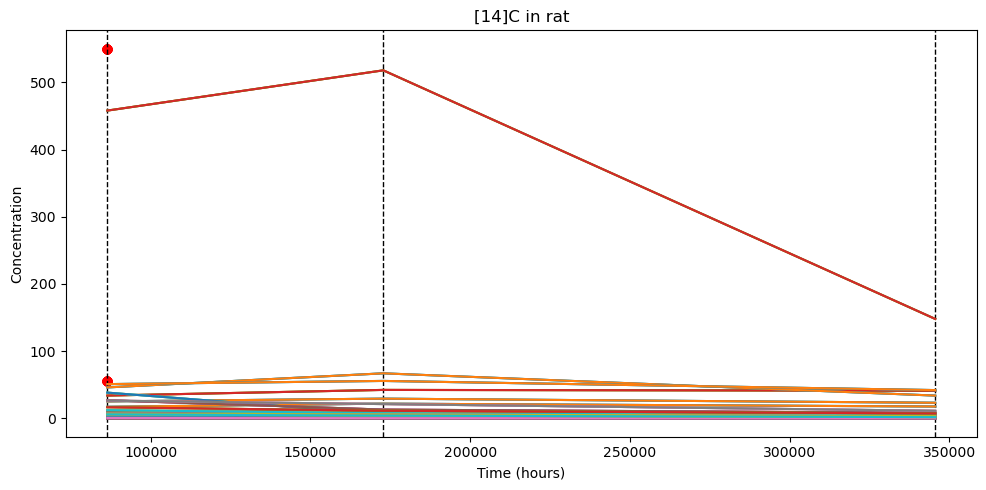

In [12]:
plot_series_by_species(group)

In [15]:
group.dose_level_normalized.value_counts()

dose_level_normalized
55.0     60
550.0    60
Name: count, dtype: int64

In [32]:
np.random.seed(0)
unique_series = group.fk_series_id.unique()
n_test_series = int(len(unique_series) * 0.2)
test_ids = np.random.choice(unique_series, n_test_series, replace = False)

In [36]:
group["ds_type"] = group.fk_series_id.apply(lambda x: "train" if x not in test_ids else "test")
group["ds_type"].value_counts(True)

ds_type
train    0.8
test     0.2
Name: proportion, dtype: float64

In [38]:
group.value_counts(["ds_type", "dose_level_normalized"], True)

ds_type  dose_level_normalized
train    550.0                    0.425
         55.0                     0.375
test     55.0                     0.125
         550.0                    0.075
Name: proportion, dtype: float64

In [39]:
group.to_csv("Dataset/training_data.csv")

In [50]:
group.columns

Index(['fk_series_id', 'time_original', 'conc_original', 'conc_sd_original',
       'conc_lower_bound_original', 'conc_upper_bound_original',
       'no_conc_val_type', 'time_hr', 'conc', 'conc_sd', 'conc_lower_bound',
       'conc_upper_bound', 'analyte_name_original', 'fk_analyzed_chemical_id',
       'author_comment', 'conc_units_normalized', 'analytical_method_detail',
       'n_subjects_in_series', 'fk_subject_id', 'conc_medium_normalized',
       'curator_comment', 'fk_study_id', 'radiolabeled', 'analyte_dtxsid',
       'analyte_casrn', 'test_substance_dtxsid', 'test_substance_casrn',
       'fk_test_chemical_id', 'fk_dosed_chemical_id', 'dose_level_normalized',
       'administration_route_normalized', 'dose_duration', 'parameter_name',
       'parameter_value', 'species', 'sex', 'age', 'age_category', 'notes',
       'subtype', 'height', 'weight', 'weight_kg', 'weight_estimated',
       'series_length', 'ds_type'],
      dtype='object')

In [53]:
group.dose_duration.unique()

array([nan], dtype=object)

In [55]:
group[["sex", "age", "age_category", 'subtype', 'height', 'weight', 'weight_kg', 'weight_estimated']].describe(include = "all")

,sex,age,age_category,subtype,height,weight,weight_kg,weight_estimated
count,120,120,120,120,0,120,1.200000e+02,120.0
unique,1,1,1,1,0,1,NaN,NaN
top,male,8-12 weeks,adolescent,Fisher,NaN,400 g,NaN,NaN
freq,120,120,120,120,NaN,120,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,8.919025e-16,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e-01,0.0


In [58]:
group.weight_kg.value_counts()

weight_kg
0.4    120
Name: count, dtype: int64